In [59]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
import scipy.stats as stats
datestring1 = "201706"
datestring2 = "201707"

Populating the interactive namespace from numpy and matplotlib


### Idea to investigate
Males make longer rides on average than females do.

### Null hypothesis
Mean ride length for males is equal to or smaller than mean ride length for females.

### Alternative hypothesis
Mean ride length for males is longer than mean ride length for women.

### Significance level
alpha = 0.05

In [7]:
os.getenv("PUIDATA")
os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring1 + "-citibike-tripdata.zip")
os.system("mv " + datestring1 + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring1 + "-citibike-tripdata.zip")

os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring2 + "-citibike-tripdata.zip")
os.system("mv " + datestring2 + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring2 + "-citibike-tripdata.zip")


2304

In [13]:
input1=pd.read_csv(os.getenv("PUIDATA")+"/"+datestring1+"-citibike-tripdata.csv")
#input2=pd.read_csv(os.getenv("PUIDATA")+"/"+datestring2+"-citibike-tripdata.csv")                   

In [15]:
df=pd.concat([input1,input2])

In [18]:
# Check it merged OK

print("Two inputs (one month each): ", input1.shape,"  ", input2.shape)
print("Merged (two months): ", df.shape)

Two inputs (one month each):  (1731594, 15)    (1735599, 15)
Merged (two months):  (3467193, 15)


In [19]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [20]:
df.head()

,tripduration,gender
0,1397,1
1,1103,1
2,1810,1
3,1760,2
4,2165,1


In [40]:
quantile=df.tripduration.quantile(0.95)
print("Original shape: ",df.shape)
df=df[df.tripduration < quantile]
print("Trimmed shape: ",df.shape)

Original shape:  (3467193, 2)
Trimmed shape:  (3293678, 2)


In [69]:
# data for males and females: examine the mean and standard deviation.
a=df[df.gender == 1].tripduration.describe()
b=df[df.gender == 2].tripduration.describe()
pd.DataFrame([a,b],index=['Male','Female'])

,count,mean,std,min,25%,50%,75%,max
Male,2157294.0,697.757651,458.940638,61.0,349.0,568.0,938.0,2154.0
Female,764300.0,792.610644,481.399405,61.0,414.0,671.0,1084.0,2154.0


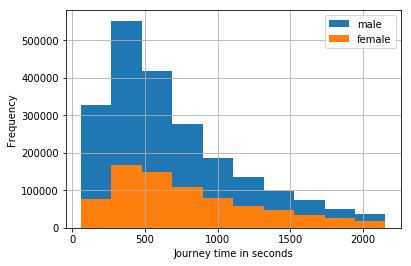

In [63]:
# represent this as a histogram

df[df['gender'] == 1].tripduration.hist(label="male")
df[df['gender'] == 2].tripduration.hist(label="female")
pl.xlabel("Journey time in seconds")
pl.ylabel("Frequency")
pl.legend()


In [22]:
gender_av=df.groupby('gender').mean()

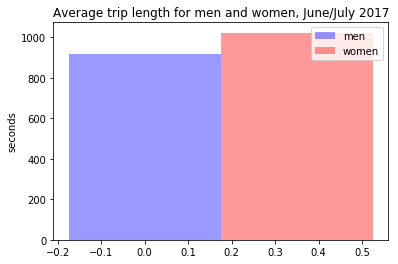

In [70]:
# Visual inspection for hypothesis that males and females have different ride lengths based on the overall mean

fig, ax = pl.subplots()

ind = np.arange(1)
bar_width = 0.35
categories=("Men","Women")

bar1=pl.bar(ind,gender_av['tripduration'][1], bar_width, alpha=0.4, color="b", label="men")
bar2=pl.bar(ind+bar_width,gender_av['tripduration'][2], bar_width, alpha=0.4, color="r", label='women')


plt.ylabel('seconds')
plt.legend()
plt.title('Average trip length for men and women, June/July 2017')

In [68]:
# Use two sample T-test

stats.ttest_ind(df[df.gender == 1].tripduration,df[df.gender == 2].tripduration,equal_var=True,nan_policy='omit',axis=0)

Ttest_indResult(statistic=-153.26704832438881, pvalue=0.0)

### Null hypothesis is rejected because p<0.5.

In [27]:
print("*** Citibike average trip length in June/July 2017 ***")
print("Male: %.2f seconds"%gender_av['tripduration'][1])
print("Female: %.2f seconds"%gender_av['tripduration'][2])

*** Citibike average trip length in June/July 2017 ***
Male: 915.67 seconds
Female: 1021.78 seconds
